In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import networkx as nx
import torch
import pandas as pd
from scipy import linalg
from networkx.algorithms.community import quality
from networkx.algorithms import community, centrality
import random
from random import sample

https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.036104

A network of coauthorships between 379 scientists whose research centers on the properties of networks of one kind or another. Vertex diameters indicate the community centrality, and the ten vertices with highest centralities are highlighted. For those readers curious about the identities of the vertices, an annotated version of this figure, names and all, can be found in Ref. 84 Inset: a scatter plot of community centrality against vertex degrees. Like most centrality measures, this one is correlated with degree, though only moderately strongly.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

data = nx.read_gml('/content/drive/My Drive/netscience.gml')

#data.nodes
#data.edges

Mounted at /content/drive


In [3]:
##Resistance Distance Calculation of Largest Cponnected Network

import networkx as nx
import numpy as np

# Assuming 'data' has 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Extract the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc)

# Compute the Laplacian matrix
L = nx.laplacian_matrix(largest_cc_graph).toarray()

# Compute the effective resistance matrix (inverse of the Laplacian)
Gamma = L + 1 / len(largest_cc) * np.ones((len(largest_cc), len(largest_cc)))
Gamma_inv = np.linalg.inv(Gamma)

# Extract the resistance distance matrix
resistance_distance_matrix = np.zeros_like(Gamma_inv)
for i in range(len(largest_cc)):
    for j in range(len(largest_cc)):
        resistance_distance_matrix[i, j] = Gamma_inv[i, i] + Gamma_inv[j, j] - 2 * Gamma_inv[i, j]

# Print or analyze the resistance distance matrix as needed
print("Resistance Distance Matrix:")
print(resistance_distance_matrix)

Resistance Distance Matrix:
[[0.         2.40307233 2.53465721 ... 2.64684582 1.69001781 1.63312572]
 [2.40307233 0.         3.26751769 ... 3.11828769 2.16207325 2.34796121]
 [2.53465721 3.26751769 0.         ... 3.33980944 2.38179654 1.85655591]
 ...
 [2.64684582 3.11828769 3.33980944 ... 0.         1.38310031 2.334548  ]
 [1.69001781 2.16207325 2.38179654 ... 1.38310031 0.         1.37588758]
 [1.63312572 2.34796121 1.85655591 ... 2.334548   1.37588758 0.        ]]


In [ ]:
##Shortest Path and Resistance Distance Correlation


import networkx as nx
import numpy as np

# Assuming 'data' has 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Extract the largest connected component
largest_cc_nodes = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc_nodes)

# Compute shortest path lengths
shortest_paths = dict(nx.all_pairs_shortest_path_length(largest_cc_graph))

# Compute the Laplacian matrix
L = nx.laplacian_matrix(largest_cc_graph).toarray()

# Compute the effective resistance matrix (inverse of the Laplacian)
Gamma = L + 1 / len(largest_cc_nodes) * np.ones((len(largest_cc_nodes), len(largest_cc_nodes)))
Gamma_inv = np.linalg.inv(Gamma)

# Extract the resistance distance matrix
resistance_distance_matrix = np.zeros_like(Gamma_inv)
for i in range(len(largest_cc_nodes)):
    for j in range(len(largest_cc_nodes)):
        resistance_distance_matrix[i, j] = Gamma_inv[i, i] + Gamma_inv[j, j] - 2 * Gamma_inv[i, j]

# Extract the corresponding values of shortest path lengths and resistance distances
shortest_path_lengths = []
resistance_distances = []
for i, source in enumerate(largest_cc_nodes):
    for j, target in enumerate(largest_cc_nodes):
        if i != j:
            shortest_path_lengths.append(shortest_paths[source][target])
            resistance_distances.append(resistance_distance_matrix[i, j])

# Convert lists to numpy arrays
shortest_path_lengths = np.array(shortest_path_lengths)
resistance_distances = np.array(resistance_distances)

# Calculate correlation coefficient
correlation = np.corrcoef(shortest_path_lengths, resistance_distances)[0, 1]

print("Correlation coefficient between shortest path lengths and resistance distances in the largest connected component:", correlation)


Correlation coefficient between shortest path lengths and resistance distances in the largest connected component: 0.761277036153127


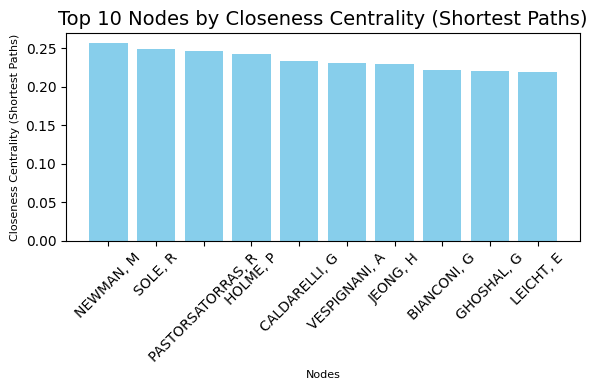

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


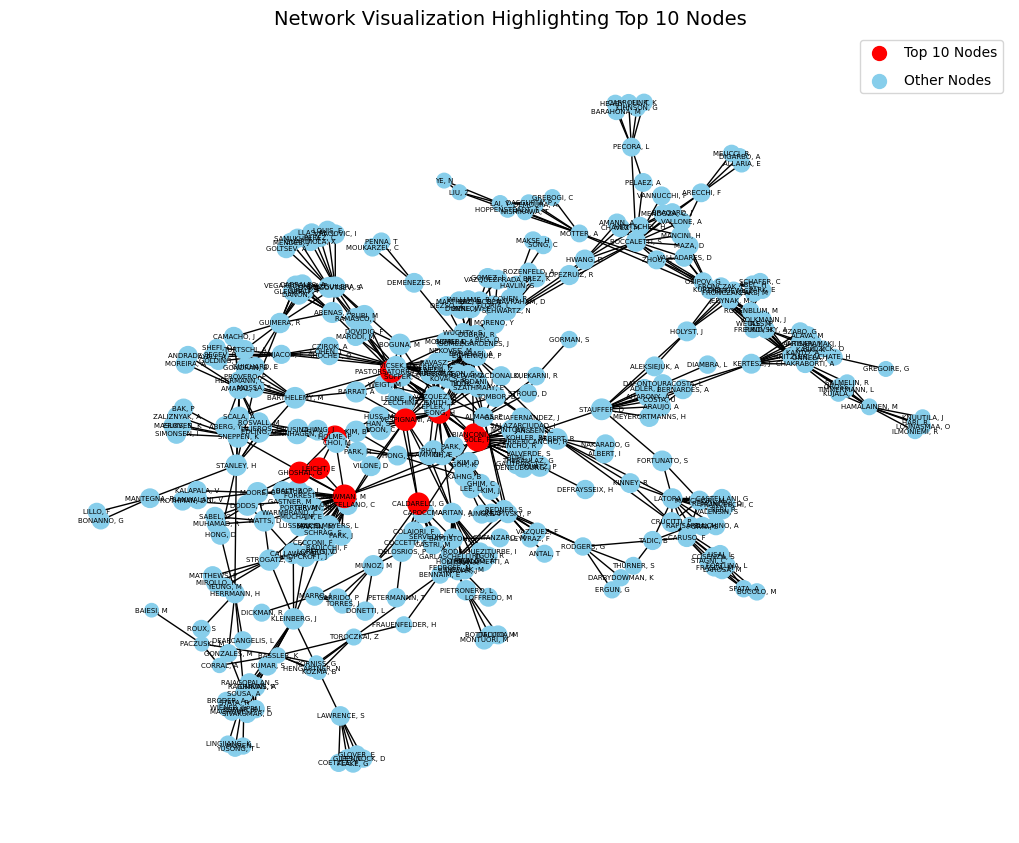

In [30]:
###Closeness Centrality based on  shortest path distance

import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'data' has 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Extract the largest connected component
largest_cc_nodes = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc_nodes)

# Calculate closeness centrality based on shortest paths
closeness_centrality = nx.closeness_centrality(largest_cc_graph)

# # Print or analyze the closeness centrality values as needed
# print("Closeness centrality:", closeness_centrality)


# Sort nodes by closeness centrality
sorted_centrality = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)

# Sort nodes by closeness centrality and extract the top 10
sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)
top_10_nodes = sorted_closeness[:10]

# Separate nodes and values for plotting
top_nodes, top_values = zip(*top_10_nodes)

# Bar Plot for Top 10 Nodes
plt.figure(figsize=(6, 4))
plt.bar(top_nodes, top_values, color='skyblue')
plt.xlabel('Nodes', fontsize=8)
plt.ylabel('Closeness Centrality (Shortest Paths)', fontsize=8)
plt.title('Top 10 Nodes by Closeness Centrality (Shortest Paths)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Network Visualization with Highlighted Top 10 Nodes
pos = nx.spring_layout(largest_cc_graph)  # Define positions for nodes

# Node sizes and colors based on closeness centrality
node_sizes = [closeness_centrality[node] * 1000 for node in largest_cc_graph.nodes()]
node_colors = ['red' if node in top_nodes else 'skyblue' for node in largest_cc_graph.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(
    largest_cc_graph,
    pos,
    with_labels=True,
    node_size=node_sizes,
    font_size=5,
    node_color=node_colors,
    cmap=plt.cm.viridis
)

# Add a legend for top nodes
plt.scatter([], [], color='red', label='Top 10 Nodes', s=100)
plt.scatter([], [], color='skyblue', label='Other Nodes', s=100)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, loc='best')

plt.title('Network Visualization Highlighting Top 10 Nodes', fontsize=14)
plt.show()



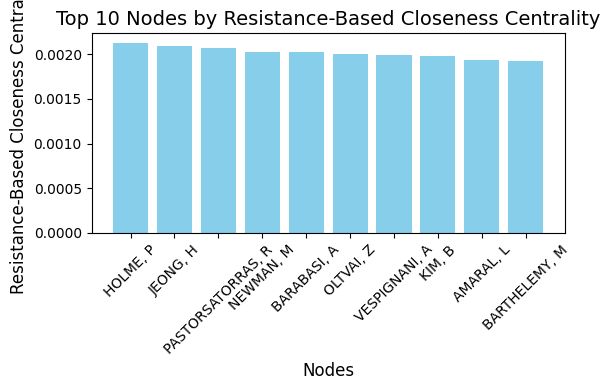

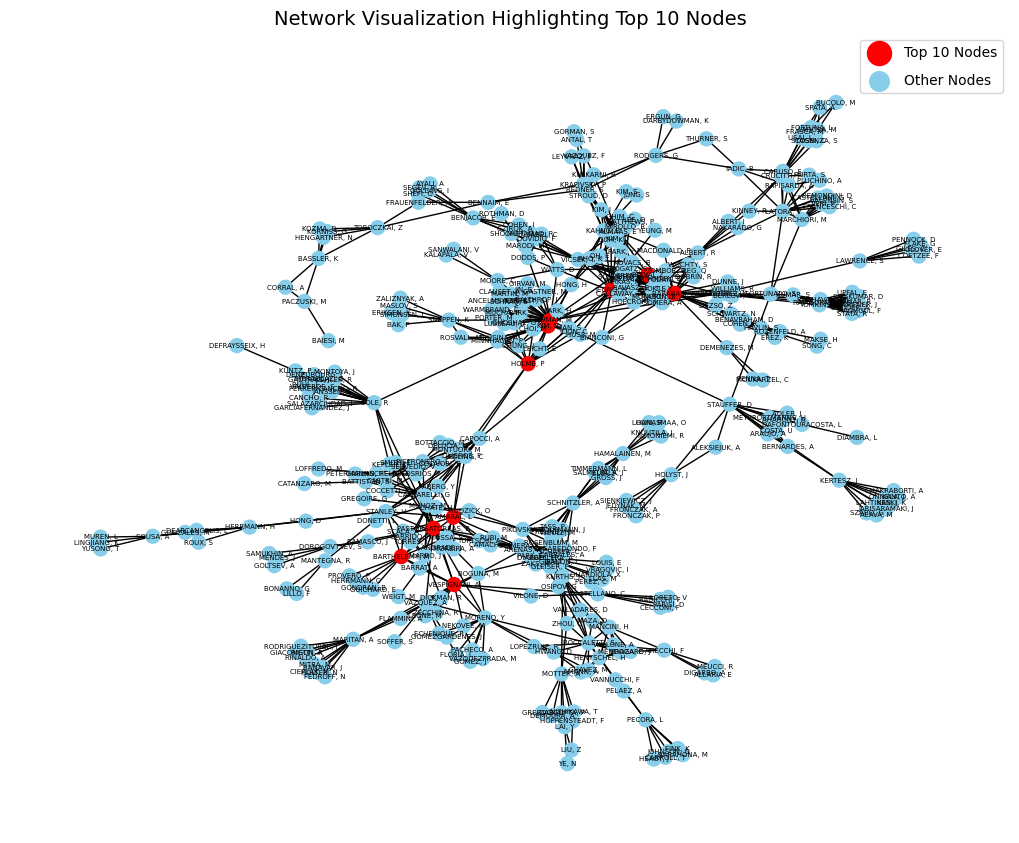

In [39]:
###Closeness centrality based on Resistance Distance

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Sum of resistance distances for each node
resistance_distances_sum = np.sum(resistance_distance_matrix, axis=1)

# Invert the sums to obtain closeness centrality values
closeness_centrality_resistance = 1 / resistance_distances_sum

# Print or analyze the closeness centrality values as needed
#print("Closeness centrality based on resistance distance:")
#print(closeness_centrality_resistance)

# Map centrality values to node labels
node_list = list(largest_cc_graph.nodes())
closeness_dict = dict(zip(node_list, closeness_centrality_resistance))

# Sort nodes by closeness centrality and extract the top 10
sorted_closeness = sorted(closeness_dict.items(), key=lambda x: x[1], reverse=True)
top_10_nodes = sorted_closeness[:10]

# Separate nodes and values for plotting
top_nodes, top_values = zip(*top_10_nodes)

# Bar Plot for Top 10 Nodes
plt.figure(figsize=(6, 4))
plt.bar(top_nodes, top_values, color='skyblue')
plt.xlabel('Nodes', fontsize=12)
plt.ylabel('Resistance-Based Closeness Centrality', fontsize=12)
plt.title('Top 10 Nodes by Resistance-Based Closeness Centrality', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Network Visualization with Highlighted Top 10 Nodes
pos = nx.spring_layout(largest_cc_graph)  # Define positions for nodes

# Node sizes and colors based on closeness centrality
scaling_factor=2000
node_sizes = [max(closeness_dict[node] * scaling_factor, 100) for node in largest_cc_graph.nodes()]
node_colors = ['red' if node in top_nodes else 'skyblue' for node in largest_cc_graph.nodes()]

plt.figure(figsize=(10, 8))
nx.draw(
    largest_cc_graph,
    pos,
    with_labels=True,
    node_size=node_sizes,
    font_size=5,
    node_color=node_colors,
    cmap=plt.cm.viridis
)

# Add a legend for top nodes
plt.scatter([], [], color='red', label='Top 10 Nodes', s=300)
plt.scatter([], [], color='skyblue', label='Other Nodes', s=200)
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, loc='best')

plt.title('Network Visualization Highlighting Top 10 Nodes', fontsize=14)
plt.show()



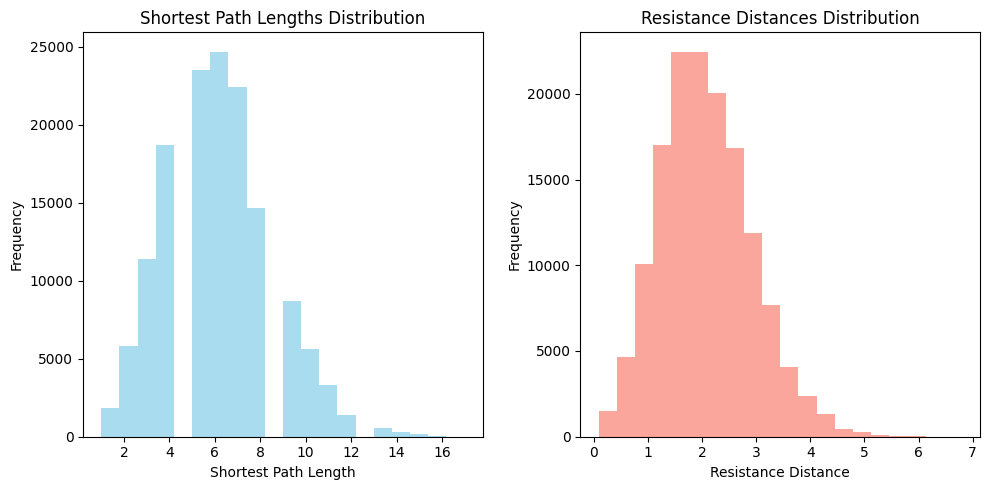

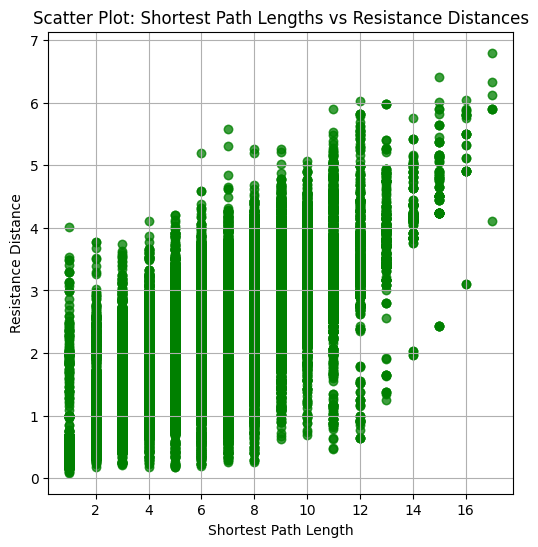

In [5]:
#### Histogram of closeness centrality
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' has 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Extract the largest connected component
largest_cc_nodes = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc_nodes)

# Compute shortest path lengths
shortest_paths = dict(nx.all_pairs_shortest_path_length(largest_cc_graph))

# Compute the Laplacian matrix
L = nx.laplacian_matrix(largest_cc_graph).toarray()

# Compute the effective resistance matrix (inverse of the Laplacian)
Gamma = L + 1 / len(largest_cc_nodes) * np.ones((len(largest_cc_nodes), len(largest_cc_nodes)))
Gamma_inv = np.linalg.inv(Gamma)

# Extract the resistance distance matrix
resistance_distance_matrix = np.zeros_like(Gamma_inv)
for i in range(len(largest_cc_nodes)):
    for j in range(len(largest_cc_nodes)):
        resistance_distance_matrix[i, j] = Gamma_inv[i, i] + Gamma_inv[j, j] - 2 * Gamma_inv[i, j]

# Extract the corresponding values of shortest path lengths and resistance distances
shortest_path_lengths = []
resistance_distances = []
for i, source in enumerate(largest_cc_nodes):
    for j, target in enumerate(largest_cc_nodes):
        if i != j:
            shortest_path_lengths.append(shortest_paths[source][target])
            resistance_distances.append(resistance_distance_matrix[i, j])

# Plot histograms
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(shortest_path_lengths, bins=20, color='skyblue', alpha=0.7)
plt.title('Shortest Path Lengths Distribution')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(resistance_distances, bins=20, color='salmon', alpha=0.7)
plt.title('Resistance Distances Distribution')
plt.xlabel('Resistance Distance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot scatter plot
plt.figure(figsize=(6, 6))
plt.scatter(shortest_path_lengths, resistance_distances, color='green', alpha=0.5)
plt.title('Scatter Plot: Shortest Path Lengths vs Resistance Distances')
plt.xlabel('Shortest Path Length')
plt.ylabel('Resistance Distance')
plt.grid(True)
plt.show()


In [9]:
import networkx as nx

# Defining 'data' 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Compute centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Identify influential authors based on the centrality measures
influential_authors_degree = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
influential_authors_betweenness = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
influential_authors_eigenvector = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]

print("Based on Shortest Path:")
print("Top Authors (Degree Centrality):", influential_authors_degree)
print("Top Authors (Betweenness Centrality):", influential_authors_betweenness)
print("Top Authors (Eigenvector Centrality):", influential_authors_eigenvector)


# Centrality Measures Based on Resistance Distance

# Compute the resistance distance matrix for the full network
# Laplacian matrix of the graph
L = nx.laplacian_matrix(G).toarray()

# Pseudo-inverse of the Laplacian
L_pseudo_inv = np.linalg.pinv(L)

# Compute resistance distance matrix using pseudoinverse
n = len(G.nodes())
resistance_distance_matrix = np.zeros((n, n))
nodes_list = list(G.nodes())
for i in range(n):
    for j in range(n):
        resistance_distance_matrix[i, j] = L_pseudo_inv[i, i] + L_pseudo_inv[j, j] - 2 * L_pseudo_inv[i, j]

# 1. Degree Centrality (Sum of resistance distances)
degree_centrality_resistance = {node: 1 / np.sum(resistance_distance_matrix[i, :])
                                for i, node in enumerate(nodes)}

# 2. Betweenness Centrality (Resistance-Based)
# betweenness_centrality_resistance = nx.betweenness_centrality(G, weight='resistance')  # Add resistance-based weights

# Betweenness-like measure: based on resistance distance
betweenness_centrality_resistance = {
    node: np.mean(resistance_distance_matrix[i, :]) for i, node in enumerate(nodes)
}

# 3. Eigenvector Centrality (Resistance-Based)
# # Create a weight mapping using resistance distances as weights
# weight_map = {
#     (u, v): 1 / resistance_distance_matrix[list(G.nodes()).index(u),
#                                            list(G.nodes()).index(v)]
#     for u, v in G.edges()
# }
# nx.set_edge_attributes(G, weight_map, 'weight')

# eigenvector_centrality_resistance = nx.eigenvector_centrality(G, weight='weight')

# 3. Resistance-Based Eigenvector Centrality
# Eigenvector centrality using resistance distance matrix
eigvals, eigvecs = np.linalg.eig(resistance_distance_matrix)
principal_eigenvector = np.abs(eigvecs[:, np.argmax(eigvals)])
eigenvector_centrality_resistance = {node: principal_eigenvector[i] for i, node in enumerate(nodes)}


# Identify Influential Authors Based on Each Centrality Measure
influential_authors_degreee = sorted(degree_centrality_resistance, key=degree_centrality_resistance.get, reverse=True)[:5]
influential_authors_betweennesss = sorted(betweenness_centrality_resistance, key=betweenness_centrality_resistance.get, reverse=True)[:5]
influential_authors_eigenvectorr = sorted(eigenvector_centrality_resistance, key=eigenvector_centrality_resistance.get, reverse=True)[:5]

# Display Results
print("Based on Resistance Distance:")
print("Top Authors (Degree Centrality):", influential_authors_degreee)
print("Top Authors (Betweenness Centrality):", influential_authors_betweennesss)
print("Top Authors (Eigenvector Centrality):", influential_authors_eigenvectorr)



Based on Shortest Path:
Top Authors (Degree Centrality): ['BARABASI, A', 'JEONG, H', 'NEWMAN, M', 'OLTVAI, Z', 'YOUNG, M']
Top Authors (Betweenness Centrality): ['NEWMAN, M', 'PASTORSATORRAS, R', 'MORENO, Y', 'SOLE, R', 'BOCCALETTI, S']
Top Authors (Eigenvector Centrality): ['UETZ, P', 'CAGNEY, G', 'MANSFIELD, T', 'GIOT, L', 'JUDSON, R']
Based on Resistance Distance:
Top Authors (Degree Centrality): ['AGRAWAL, H', 'AXELROD, R', 'BAVELAS, A', 'BIGGS, N', 'BRESSLER, S']
Top Authors (Betweenness Centrality): ['BAIESI, M', 'GREGOIRE, G', 'CORRAL, A', 'PACZUSKI, M', 'BARAHONA, M']
Top Authors (Eigenvector Centrality): ['BAIESI, M', 'GREGOIRE, G', 'CORRAL, A', 'PACZUSKI, M', 'BARAHONA, M']


Degree centrality measures how many connections a node (author) has in the network.
In a collaboration network, it would represent the number of collaborations an author has.
To compute degree centrality for each author:
Count the number of collaborations each author has (number of edges connected to the node).


Betweenness centrality identifies authors that act as bridges between other authors in the network.
It quantifies how often a node appears on the shortest paths between pairs of other nodes.
To compute betweenness centrality for each author:
Find the shortest paths between all pairs of authors.
Count the number of times each author appears on these shortest paths.


Eigenvector centrality measures the importance of a node in the network, considering the importance of its neighbors.
An author connected to other well-connected authors will have a higher eigenvector centrality.
To compute eigenvector centrality for each author:
Formulate the network's adjacency matrix.
Use an iterative algorithm (e.g., power iteration) to find the eigenvector corresponding to the largest eigenvalue.
The resulting eigenvector contains centrality scores for each author.

Betweenness centrality measures how often a node acts as a bridge (or intermediary) along the shortest paths between pairs of other nodes in the network. Nodes with high betweenness centrality have a significant influence on the flow of information or interactions between other nodes.

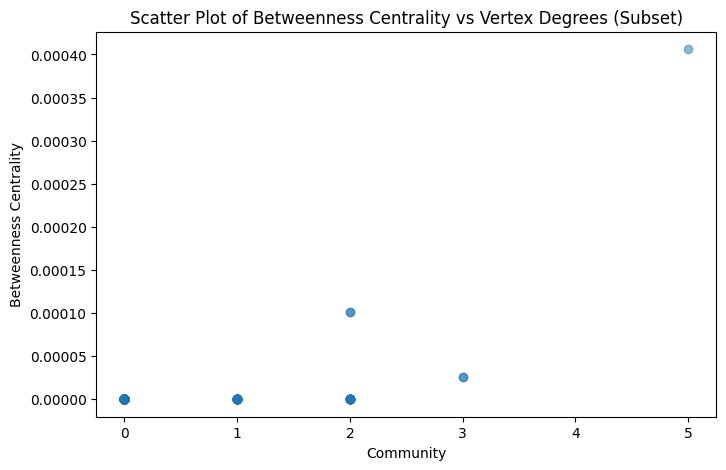

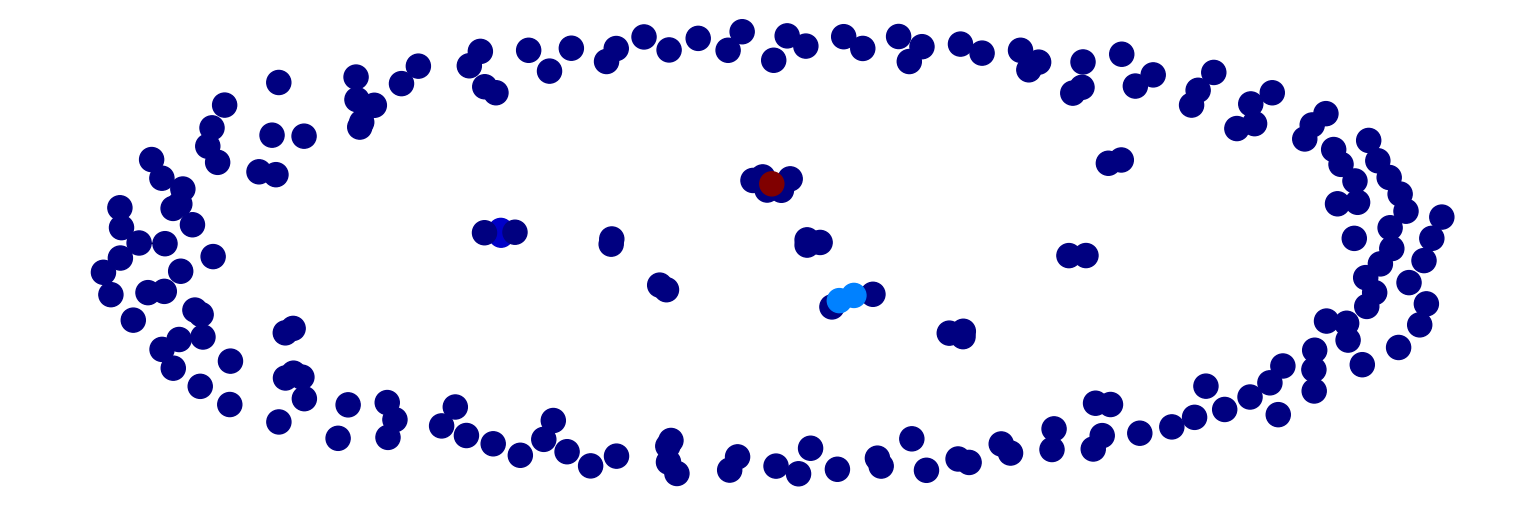

In [ ]:
#Betweeness Centrality Vs Vertex degress from Newman Girvan Algorithm

# Get the list of nodes
all_nodes = list(data.nodes)

# Set the size of the subset you want
subset_size = 200  # Adjust as needed

# Randomly sample nodes
subset_nodes = random.sample(all_nodes, subset_size)

# Create a subgraph using only the subset of nodes
subgraph = data.subgraph(subset_nodes)

# Apply Newman-Girvan algorithm to the subgraph
communities = list(nx.community.girvan_newman(subgraph))

# Choose a specific level from the hierarchy (e.g., level 2)
level = 2
final_communities = list(communities)[level - 1]

community_map = {n: i for i, com in enumerate(final_communities) for n in com}

# Calculate betweenness centrality for nodes in the final communities
betweenness_centrality = nx.betweenness_centrality(subgraph)
node_degrees = dict(subgraph.degree())

# Assign a color to each node based on its betweenness centrality
color_map = [betweenness_centrality[node] for node in subgraph.nodes]

# Extracting data for scatter plot
y_values = [betweenness_centrality[node] for node in subgraph.nodes]
x_values = [node_degrees[node] for node in subgraph.nodes]


# Creating the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x_values, y_values, alpha=0.5)
plt.title('Scatter Plot of Betweenness Centrality vs Vertex Degrees (Subset)')
plt.xlabel('Community')
plt.ylabel('Betweenness Centrality')
plt.show()

# # Visualize the graph with nodes colored by betweenness centrality

plt.figure(figsize=(15, 5))
pos = nx.spring_layout(subgraph)
nx.draw(subgraph, pos, node_color=color_map, with_labels=False, cmap=plt.cm.jet)
plt.show()

# # Print the betweenness centrality values for each node
# for node, centrality in betweenness_centrality.items():
#     print(f"Node {node}: {centrality}")

In [ ]:
import networkx as nx
import numpy as np

# Assuming 'data' has 'edges' and 'nodes' attributes
edges = data.edges  # list of edges
nodes = data.nodes  # list of nodes

# Create a NetworkX graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges to the graph
G.add_edges_from(edges)

# Extract the largest connected component
largest_cc_nodes = max(nx.connected_components(G), key=len)
largest_cc_graph = G.subgraph(largest_cc_nodes)

# Compute shortest path lengths
shortest_paths = dict(nx.all_pairs_shortest_path_length(largest_cc_graph))

# Compute the Laplacian matrix
L = nx.laplacian_matrix(largest_cc_graph).toarray()

# Compute the effective resistance matrix (inverse of the Laplacian)
Gamma = L + 1 / len(largest_cc_nodes) * np.ones((len(largest_cc_nodes), len(largest_cc_nodes)))
Gamma_inv = np.linalg.inv(Gamma)

# Extract the resistance distance matrix
resistance_distance_matrix = np.zeros_like(Gamma_inv)
for i in range(len(largest_cc_nodes)):
    for j in range(len(largest_cc_nodes)):
        resistance_distance_matrix[i, j] = Gamma_inv[i, i] + Gamma_inv[j, j] - 2 * Gamma_inv[i, j]

# Extract the corresponding values of shortest path lengths and resistance distances
shortest_path_lengths = []
resistance_distances = []
for i, source in enumerate(largest_cc_nodes):
    for j, target in enumerate(largest_cc_nodes):
        if i != j:
            shortest_path_lengths.append(shortest_paths[source][target])
            resistance_distances.append(resistance_distance_matrix[i, j])

# Convert lists to numpy arrays
shortest_path_lengths = np.array(shortest_path_lengths)
resistance_distances = np.array(resistance_distances)

# Calculate correlation coefficient
correlation = np.corrcoef(shortest_path_lengths, resistance_distances)[0, 1]

print("Correlation coefficient between shortest path lengths and resistance distances in the largest connected component:", correlation)


Correlation coefficient between shortest path lengths and resistance distances in the largest connected component: 0.7633623732273987
